In [21]:
# download data
import numpy as np
import pandas as pd
import os
import urllib.request

urls = ["http://cs.joensuu.fi/sipu/datasets/jain.txt", "http://cs.joensuu.fi/sipu/datasets/flame.txt"]

for url in urls:
  filename = url.split("/")[-1]

  # rename to csv
  filename = filename.replace(".txt", ".csv")

  # check if file exists
  if os.path.isfile(filename):
    print("File already exists: " + filename)
    continue
  
  # download file
  urllib.request.urlretrieve(url, filename)

  print("Downloaded: " + filename)

File already exists: jain.csv
File already exists: flame.csv


Szerokość marginesu dla linear: 1.4105299018892603
Szerokość marginesu dla poly: 1.3224473860952468
Szerokość marginesu dla rbf: 1.403232760318099
Szerokość marginesu dla sigmoid: 0.43251913592271024


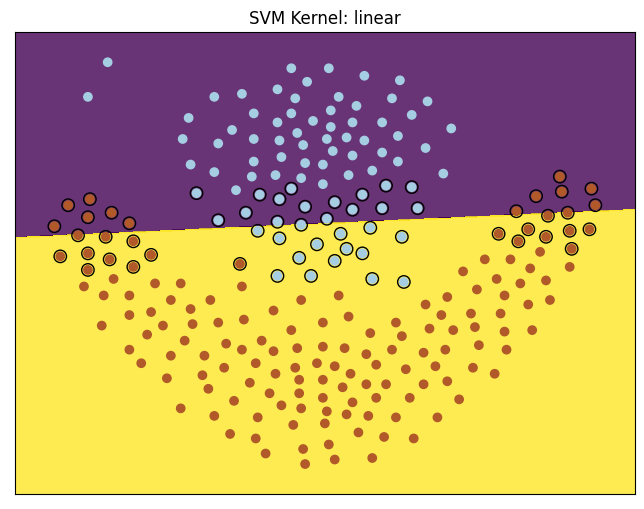

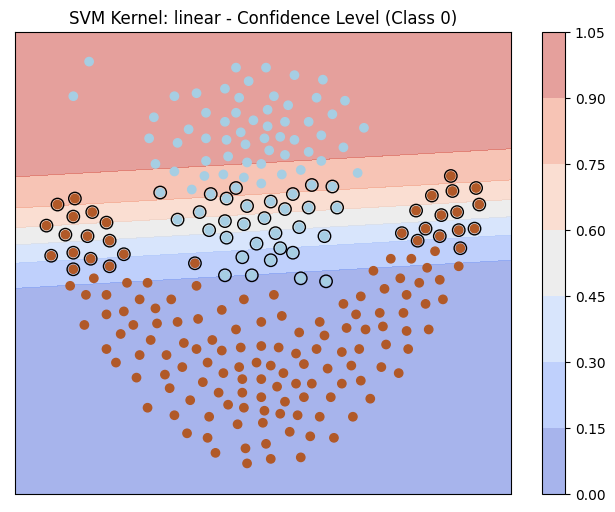

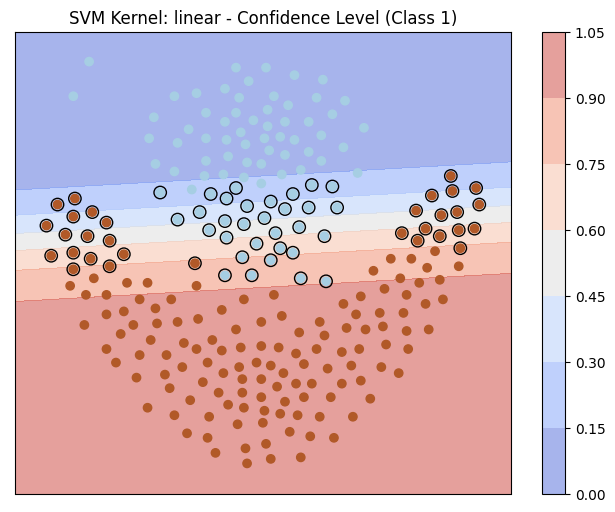

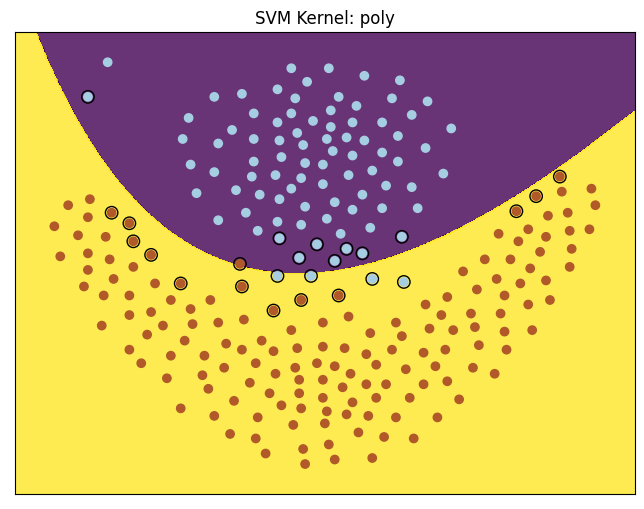

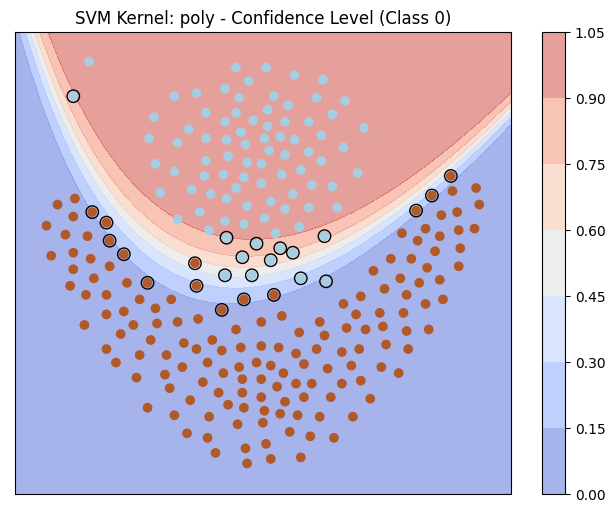

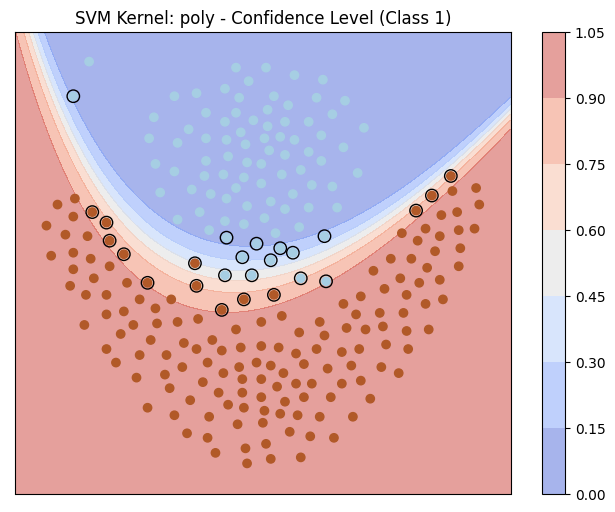

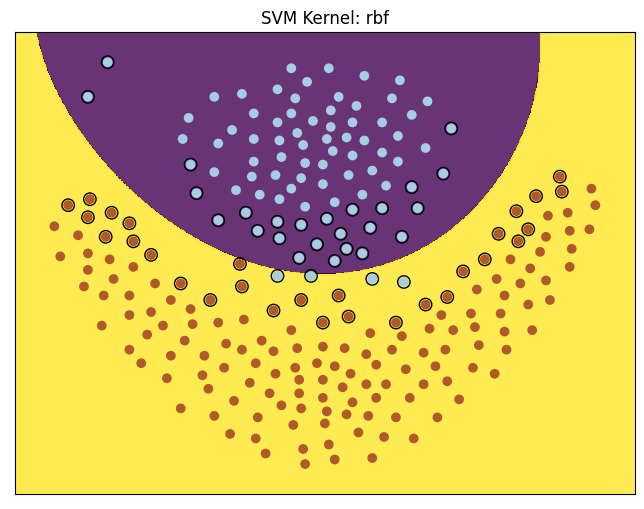

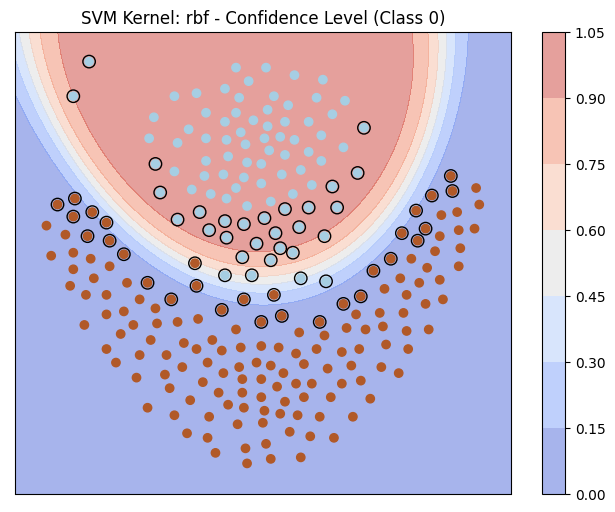

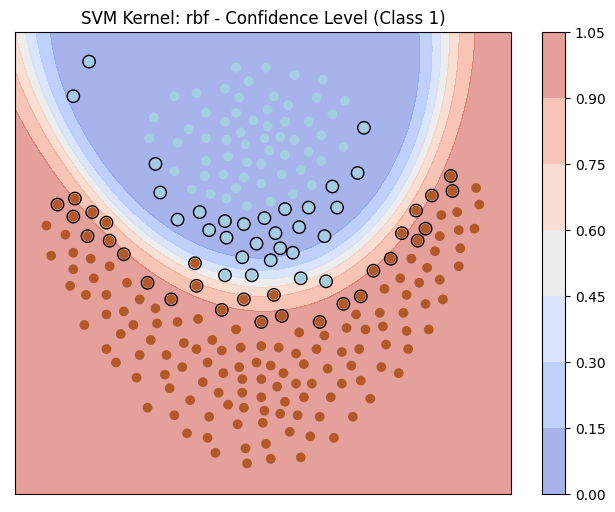

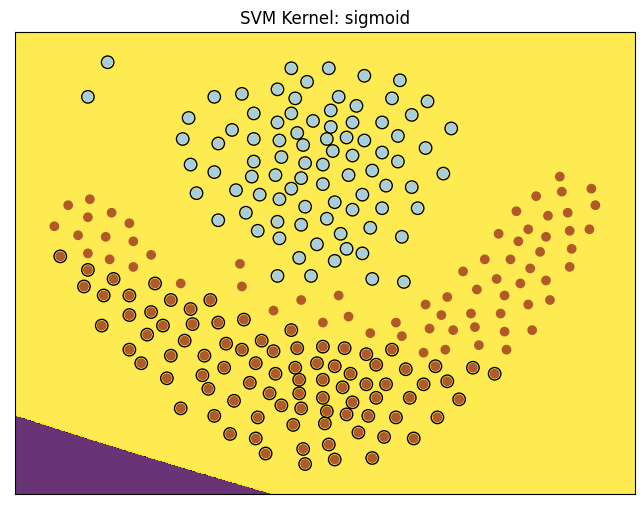

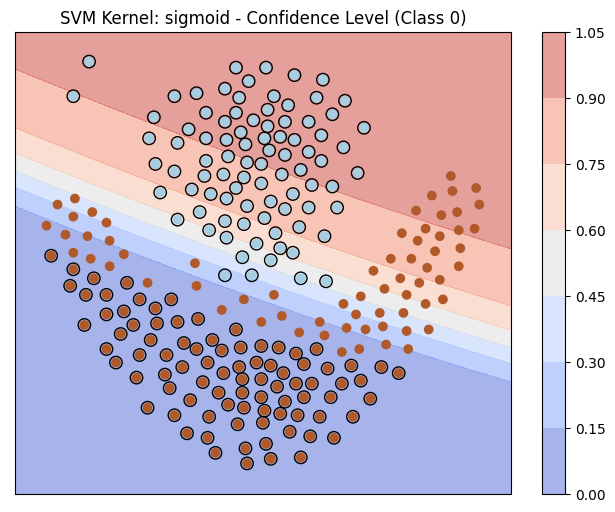

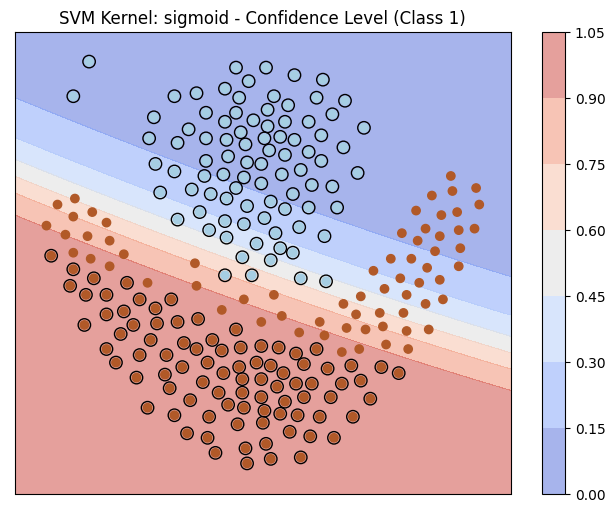

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics.pairwise import linear_kernel

# Przykładowe dane wejściowe
data = np.genfromtxt('flame.csv', delimiter='\t')
X = data[:, :-1]
y = data[:, -1]

# Tworzenie klasyfikatora SVM liniowego
linear_svc = svm.SVC(kernel='linear', C=1.0, probability=True)
linear_svc.fit(X, y)

# Tworzenie klasyfikatora SVM z różnymi kernelami
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_classifiers = [svm.SVC(kernel=kernel, C=1.0, probability=True) for kernel in kernels]
for svc_classifier in svc_classifiers:
    svc_classifier.fit(X, y)

# Definicja siatki punktów dla wizualizacji granicy decyzyjnej
h = 0.02  # Rozdzielczość
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Wizualizacja granicy decyzyjnej i obszarów klasyfikatora
for i, kernel in enumerate(kernels):
    svc_classifier = svc_classifiers[i]
    Z = svc_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Przypisanie kolorów obszarom klasyfikatora
    Z = Z.reshape(xx.shape)

    # Wyznaczenie wektorów wspierających
    support_vectors = svc_classifier.support_vectors_

    # Wizualizacja danych wejściowych
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.get_cmap('viridis', len(np.unique(y))))
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'SVM Kernel: {kernel}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    print(f"Szerokość marginesu dla {kernel}: " + str(2 * svc_classifier.decision_function(support_vectors).std()))

    # Obliczanie poziomu pewności dla każdej klasy
    if svc_classifier.probability:
        confidence_levels = svc_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

        # Wyświetlanie poziomu pewności dla klasy 0
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, confidence_levels[:, 0].reshape(xx.shape), alpha=0.5, cmap='coolwarm')
        plt.colorbar()
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.title(f'SVM Kernel: {kernel} - Confidence Level (Class 0)')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

        # Wyświetlanie poziomu pewności dla klasy 1
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, confidence_levels[:, 1].reshape(xx.shape), alpha=0.5, cmap='coolwarm')
        plt.colorbar()
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.title(f'SVM Kernel: {kernel} - Confidence Level (Class 1)')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

plt.show()
